In [1]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt

2025-07-02 09:32:30.040600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751448750.064608     867 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751448750.071974     867 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Loading the built-in IMDb review dataset
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.imdb.load_data()

print('Training data shape: ', X_train.shape, ', ', Y_train.shape)
print('Test data shape: ', X_test.shape, ', ', Y_test.shape)

Training data shape:  (25000,) ,  (25000,)
Test data shape:  (25000,) ,  (25000,)


In [3]:
print(X_train[0])
print(X_test[1])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1, 14, 22, 3443, 6, 176, 7, 5063, 8

-> This shows that the data in the dataset is already integer encoded. Let's check if the length of every vector is same or not.

In [4]:
print(len(X_train[0]), len(X_train[1]), len(X_train[2]))
print(len(X_test[0]), len(X_test[1]), len(X_test[2]))

218 189 141
68 260 603


-> Clearly, the length is not the same. So, we have to zero pad all the vectors to make them the same length.

In [5]:
# Applying zero padding
X_train = tf.keras.utils.pad_sequences(X_train, padding='post')
X_test = tf.keras.utils.pad_sequences(X_test, padding='post')

print('Training data shape: ', X_train.shape, ', ', Y_train.shape)
print('Test data shape: ', X_test.shape, ', ', Y_test.shape)

Training data shape:  (25000, 2494) ,  (25000,)
Test data shape:  (25000, 2315) ,  (25000,)


-> Now every vector in the training data has length of 2494 and in test data, has length of 2315. We can verify by again checking the length.

In [6]:
print(len(X_train[0]), len(X_train[1]), len(X_train[2]))
print(len(X_test[0]), len(X_test[1]), len(X_test[2]))

2494 2494 2494
2315 2315 2315


In [7]:
# Checking the labels
print(Y_train[0], Y_train[1], Y_train[2])
print(Y_test[0], Y_test[1], Y_test[2])

1 0 0
0 1 1


-> This shows the sentiment of the sentences. '1' means positive sentiment, '0' means negative sentiment.

<hr>

In [8]:
# Building the RNN

model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, input_shape=(2494, 1), return_sequences=False),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

I0000 00:00:1751448758.177131     867 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

-> Each vector has 2494 words (time steps) and has only one sentence (input feature). (timesteps, input_feature) is the shape in which RNN expects the input. Activation function is by default 'tanh'. return_sequences = False at the last layer means that we don't want the output at each timestep since this is many to one problem, we only need output at the end.
<br><br>
-> (1x32+32) + (32x32) = 1088 <br>
32x1 + 1 = 33

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(
    X_train, Y_train,
    epochs = 10,
    validation_data = (X_test, Y_test)
)

Epoch 1/10


I0000 00:00:1751448761.236630     914 service.cc:148] XLA service 0x33ef7b70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751448761.236676     914 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1751448761.425548     914 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/782 ━━━━━━━━━━━━━━━━━━━━ 35:09 3s/step - accuracy: 0.5938 - loss: 0.6932

I0000 00:00:1751448761.966843     914 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 149s 187ms/step - accuracy: 0.5003 - loss: 0.6955 - val_accuracy: 0.5000 - val_loss: 0.6941
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 145s 185ms/step - accuracy: 0.5012 - loss: 0.6934 - val_accuracy: 0.5010 - val_loss: 0.6942
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 145s 185ms/step - accuracy: 0.4915 - loss: 0.6971 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 145s 185ms/step - accuracy: 0.5008 - loss: 0.6942 - val_accuracy: 0.4994 - val_loss: 0.6949
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 145s 185ms/step - accuracy: 0.4948 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 145s 185ms/step - accuracy: 0.4946 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 145s 185ms/step - accuracy: 0.4983 - loss: 0.6941 - val_accuracy: 0.5003 - val_loss: 0.6940
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 184ms/step - accuracy: 0.5049 - loss: 0.69

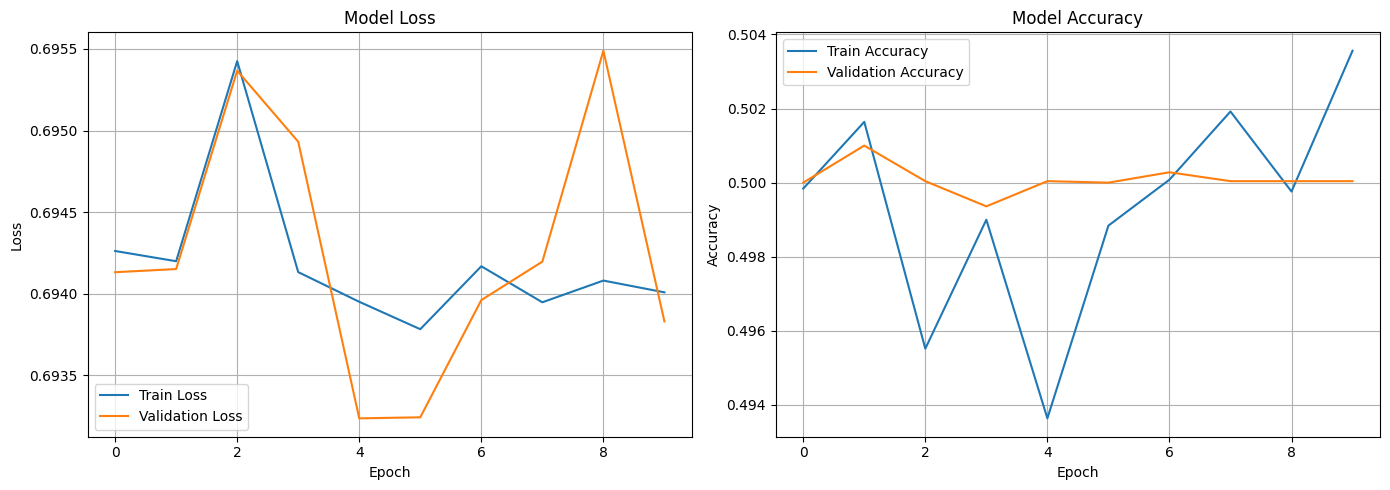

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(history.history['loss'], label='Train Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Model Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(history.history['accuracy'], label='Train Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Model Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

-> Model hasn't learned anything. It validation accuracy is the same from where it started. This is the case of underfitting.

<hr>